<a href="https://colab.research.google.com/github/rsundararajanml/Machine-Learning/blob/master/Decision_Tree_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving loan_prediction.csv to loan_prediction.csv


{'loan_prediction.csv': b'ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status\r\n5849,0,0,360,1,1\r\n4583,1508,128,360,1,0\r\n3000,0,66,360,1,1\r\n2583,2358,120,360,1,1\r\n6000,0,141,360,1,1\r\n5417,4196,267,360,1,1\r\n2333,1516,95,360,1,1\r\n3036,2504,158,360,0,0\r\n4006,1526,168,360,1,1\r\n12841,10968,349,360,1,0\r\n3200,700,70,360,1,1\r\n2500,1840,109,360,1,1\r\n3073,8106,200,360,1,1\r\n1853,2840,114,360,1,0\r\n1299,1086,17,120,1,1\r\n4950,0,125,360,1,1\r\n3596,0,100,240,0,1\r\n3510,0,76,360,0,0\r\n4887,0,133,360,1,0\r\n2600,3500,115,0,1,1\r\n7660,0,104,360,0,0\r\n5955,5625,315,360,1,1\r\n2600,1911,116,360,0,0\r\n3365,1917,112,360,0,0\r\n3717,2925,151,360,0,0\r\n9560,0,191,360,1,1\r\n2799,2253,122,360,1,1\r\n4226,1040,110,360,1,1\r\n1442,0,35,360,1,0\r\n3750,2083,120,360,1,1\r\n4166,3369,201,360,0,0\r\n3167,0,74,360,1,0\r\n4692,0,106,360,1,0\r\n3500,1667,114,360,1,1\r\n12500,3000,320,360,1,0\r\n2275,2067,0,360,1,1\r\n1828,1330,100,0,0,0\r\n3667,1

In [0]:
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image
from pylab import rcParams
from sklearn import preprocessing, tree, metrics
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from io import StringIO
import warnings


df = pd.read_csv('loan_prediction.csv')
df.head()

In [47]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0,360,1,1
1,4583,1508.0,128,360,1,0
2,3000,0.0,66,360,1,1
3,2583,2358.0,120,360,1,1
4,6000,0.0,141,360,1,1


In [0]:
%matplotlib inline
rcParams['figure.figsize']=6,6
warnings.filterwarnings('ignore')

In [0]:
def plot_decision_tree(clf, feature_name, target_name):
  dot_data = StringIO()
  tree.export_graphviz(clf, out_file=dot_data,
                            feature_names=feature_name,
                            class_names=target_name,
                            filled=True, rounded=True,
                            special_characters= True,)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())
  

In [0]:
df.shape

(614, 6)

In [0]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [51]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,-1].values
X

array([[5.849e+03, 0.000e+00, 0.000e+00, 3.600e+02, 1.000e+00],
       [4.583e+03, 1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, 3.600e+02, 1.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, 3.600e+02, 1.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, 3.600e+02, 1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, 3.600e+02, 0.000e+00]])

In [0]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [55]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
scores.mean()

0.6248528510514719

In [56]:
clf_f = dt()
y_pred = clf_f.fit(X_train, y_train).predict(X_train)
for i in np.where(y_pred == y_train):
  if y_pred.any() == False:
    print("miss classification found")
  else:
    print("NO miss classification found")
    

NO miss classification found


In [0]:
clf.fit(X_train, y_train)
train_prediction = clf.predict(X_train)
test_prediction = clf.predict(X_test)

In [73]:
print("The training F1 score", f1_score(train_prediction,y_train))
print("The test F1 score", f1_score(test_prediction,y_test))

The training F1 score 1.0
The test F1 score 0.7757009345794393


In [74]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
train_cols = df.columns[:len(df.columns)-1]
train_cols
target_cols = df.columns[-1]
target_cols

'Loan_Status'

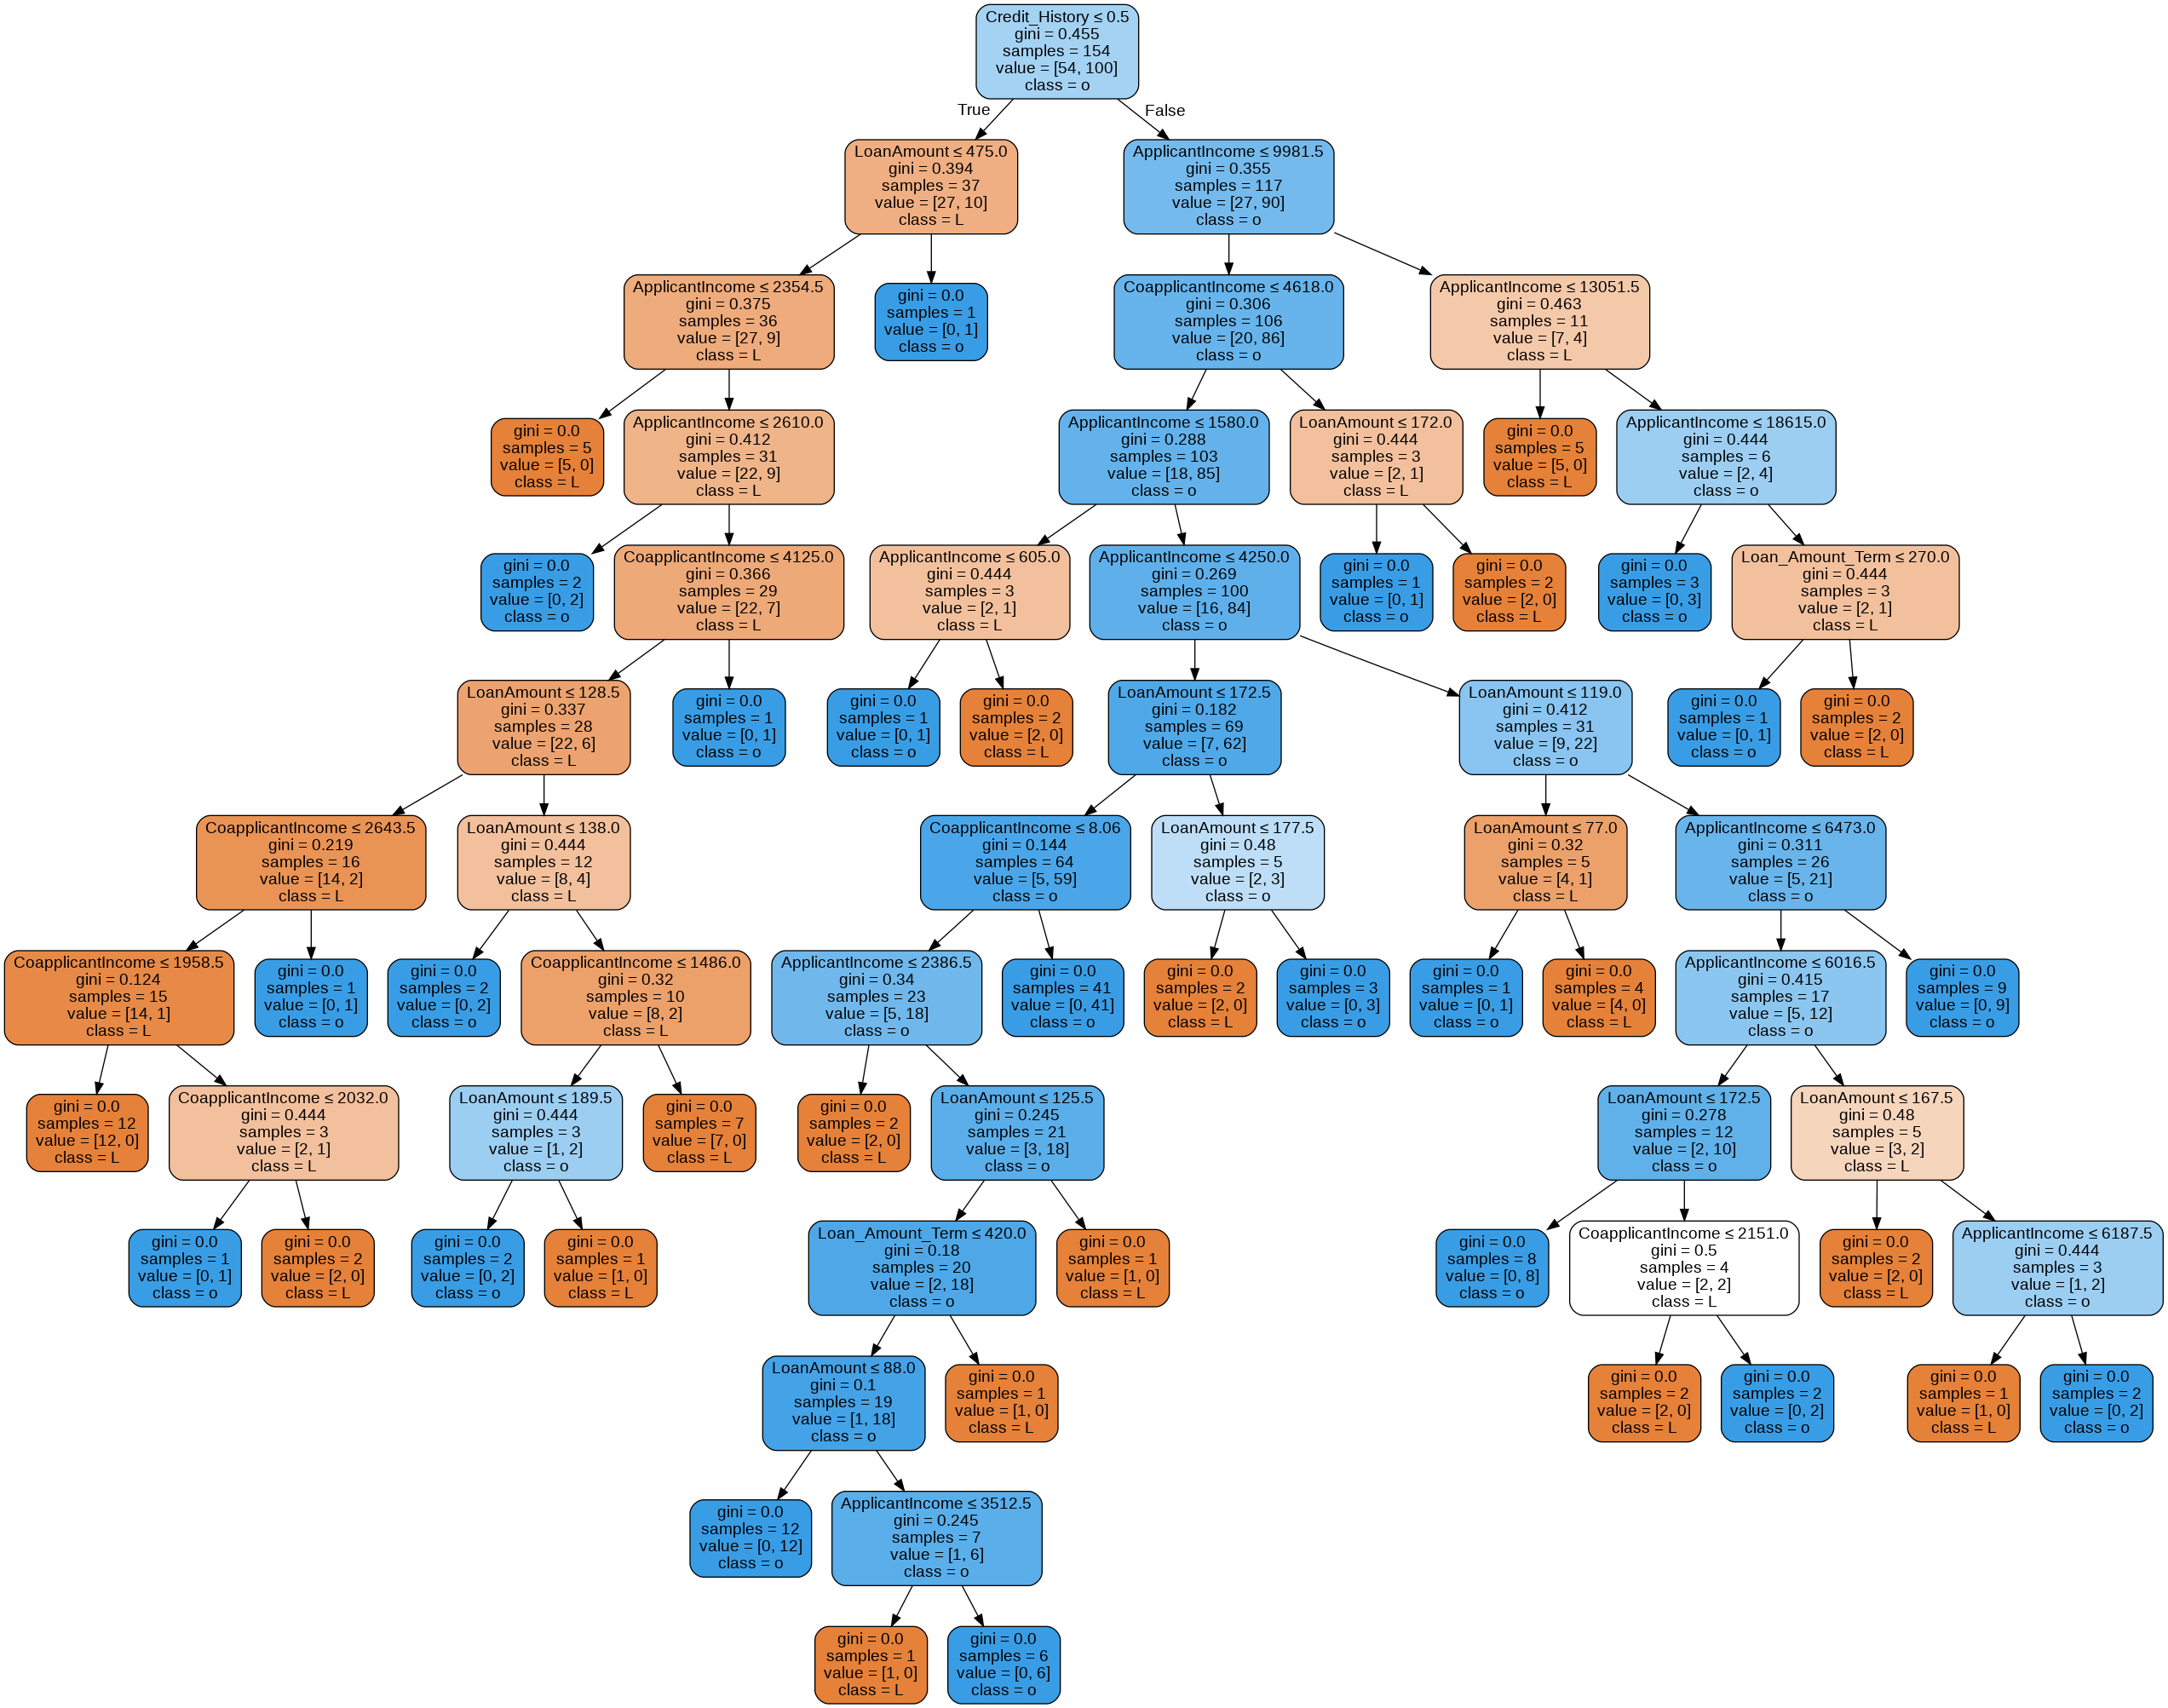

In [64]:
plot_decision_tree(clf, train_cols, target_cols)

In [0]:
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5], 'criterion':['gini','entropy']}
scorer = make_scorer(f1_score)

In [0]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

In [0]:
grid_fit = grid_obj.fit(X_train, y_train)

In [79]:
best_clf = grid_obj.best_estimator_
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

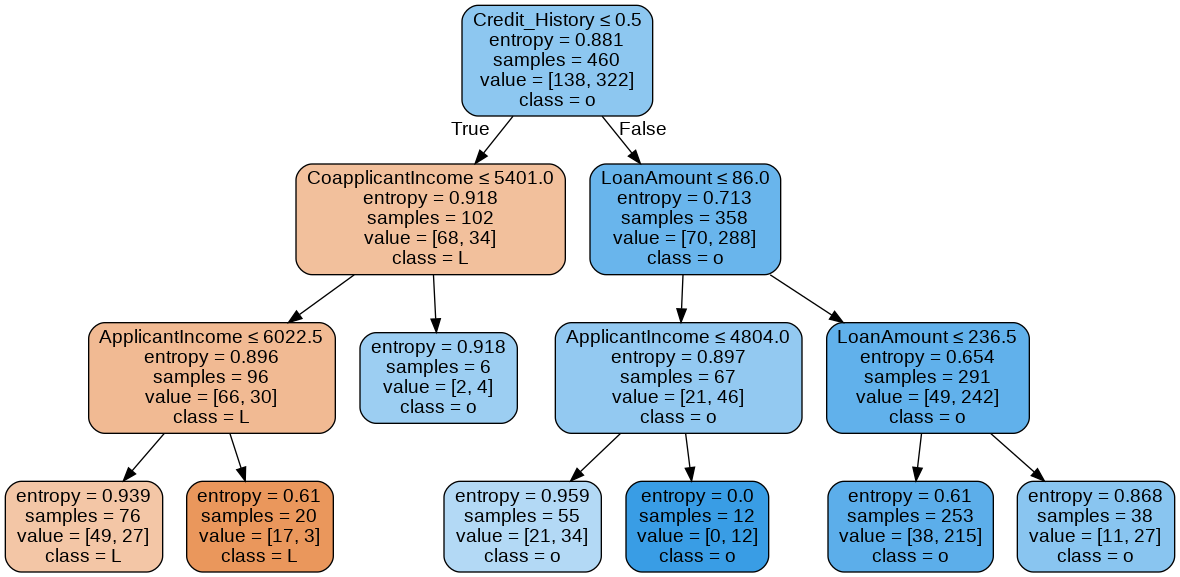

In [80]:
plot_decision_tree(best_clf, train_cols, target_cols)

In [82]:
scores_best = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='f1_macro')
scores_best.mean()

0.7028405632432928

In [83]:
best_clf.fit(X_train, y_train)
best_train_prediction = best_clf.predict(X_train)
best_test_prediction = best_clf.predict(X_test)
print("Best CLF Train score",f1_score(best_train_prediction, y_train))
print("Best CLF Test score",f1_score(best_test_prediction, y_test))

Best CLF Train score 0.8513119533527698
Best CLF Test score 0.8256880733944953
